In [65]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from heapq import heapify, heappop, heappush

In [67]:
connection_matrix = np.array([
     [0,14,25,0,0,0,0,0],
     [0,0,0,0,21,0,3,0],
     [0,0,0,13,7,0,0,0],
     [0,6,0,0,0,15,0,0],
     [0,0,0,10,0,0,0,20],
     [0,0,0,0,5,0,0,10],
     [0,0,0,3,0,0,0,0],
     [0,0,0,0,0,0,0,0]
])

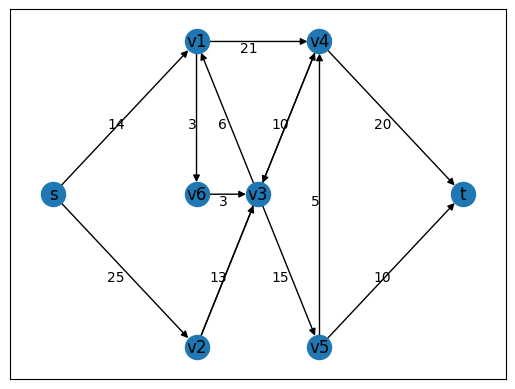

In [68]:
graph = nx.from_numpy_array(connection_matrix, create_using= nx.DiGraph, edge_attr=  'capacity')
names = {0: 's', 7: 't', 1: 'v1', 2:'v2', 3: 'v3', 4: 'v4', 5:'v5',6 : 'v6' }
graph = nx.relabel_nodes(graph, names)
# layout= nx.spring_layout(graph)

layout = {'s': np.array([-1., 0.0]),
 'v1': np.array([-0.3, 0.5]),
 'v2': np.array([-0.3, -0.5]),
 'v3': np.array([0.0, 0.0 ]),
 'v4': np.array([0.3, 0.5]),
 'v5': np.array([0.3, -0.5]),
 't': np.array([1., 0.0]),
 'v6': np.array([-0.3, 0.0])}

_=nx.draw_networkx_nodes(graph, pos = layout)
_=nx.draw_networkx_labels(graph, layout)
_=nx.draw_networkx_edge_labels(graph, pos=layout, font_size = 10, 
                                     verticalalignment='top',
                                     horizontalalignment='right',
                                     rotate= False,
                                     edge_labels= nx.get_edge_attributes(graph, 'capacity'))
_=nx.draw_networkx_edges(graph, pos = layout)

In [73]:
nx.maximum_flow(graph, _s = 's', _t = 't', capacity='capacity')

(30,
 {'s': {'v1': 14, 'v2': 16},
  'v1': {'v4': 14, 'v6': 0},
  'v2': {'v3': 9, 'v4': 7},
  'v3': {'v1': 0, 'v5': 10},
  'v4': {'v3': 1, 't': 20},
  'v5': {'v4': 0, 't': 10},
  'v6': {'v3': 0},
  't': {}})